# Handling of Time series data

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [86]:
airpassengers = pd.read_csv(r"\\wsl.localhost\Ubuntu-22.04\home\tomcat\Portfolio Machine learning\Data Manipulation\AirPassengers.csv")
airpassengers.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [88]:
airpassengers.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [90]:
airpassengers['Month'] = pd.to_datetime(airpassengers['Month'], format='%Y-%m')


This line is converting the 'Month' column in the airpassengers DataFrame from a string format to a datetime format using the pd.to_datetime() function. The format='%Y-%m' specifies that the input date format is 'Year-Month' (e.g., '1949-01').

In [92]:
airpassengers.set_index('Month', inplace=True)


This line is setting the 'Month' column as the index of the DataFrame. This is done to make 'Month' the index for easier time-series manipulation.

In [102]:
rolling_mean = airpassengers.rolling(7).mean()

This line calculates the rolling mean (moving average) of the '#Passengers' column over a window of 7 time periods (in this case, 7 months).

-airpassengers.rolling(7) creates a rolling object with a window size of 7.

-.mean() computes the average of the values within each window.

-The result is stored in rolling_mean, which is a DataFrame of the same length as airpassengers, but with NaN values for the first 6 entries because there are not enough data points to calculate the mean for the initial windows.

In [104]:
rolling_std = airpassengers.rolling(7).std()

This line calculates the rolling standard deviation of the '#Passengers' column over a window of 7 time periods.

-airpassengers.rolling(7) again creates a rolling object with a window size of 7.

-.std() computes the standard deviation of the values within each window.

-The result is stored in rolling_std, which is also a DataFrame of the same length as airpassengers, with NaN values for the first 6 entries due to insufficient data for the calculation.

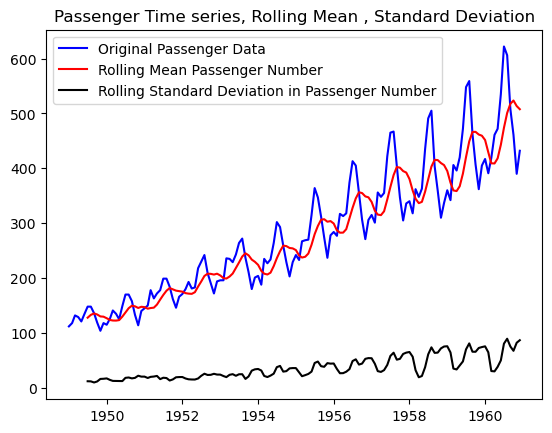

In [96]:
plt.plot(airpassengers, color = 'blue', label='Original Passenger Data')
plt.plot(rolling_mean, color = 'red', label='Rolling Mean Passenger Number')
plt.plot(rolling_std, color = 'black', label='Rolling Standard Deviation in Passenger Number')
plt.title('Passenger Time series, Rolling Mean , Standard Deviation')
plt.legend(loc='best')

1. Original Passenger Data (Blue Line):

    Pattern: The blue line represents the actual monthly passenger data. It shows a clear upward trend, indicating that the number of passengers increased over time.
    Seasonality: There are regular, repeated fluctuations or peaks and troughs each year, which suggest a seasonal pattern. This could be due to factors like holiday seasons or travel trends at specific times of the year.
    Growth: The overall trend is upwards, suggesting that over these years, the airline industry was growing, or there was increasing demand for air travel.

2. Rolling Mean (Red Line):

    Smoothing Effect: The red line represents a 7-month rolling mean of the passenger numbers. It smooths out the short-term fluctuations and highlights the underlying trend more clearly.
    Trend Visibility: The rolling mean shows a smooth upward trend, confirming the overall growth in passenger numbers. It follows the general direction of the blue line but without the sharp ups and downs, making it easier to see the long-term growth trend.
    Lag Effect: Note that the rolling mean may slightly lag behind the actual data due to the averaging effect over the 7-month window.

3. Rolling Standard Deviation (Black Line):

    Variability: The black line represents the rolling standard deviation over a 7-month window. It shows how much the passenger numbers fluctuate around the rolling mean.
    Trend in Variability: The rolling standard deviation is relatively low in the early years (around 1949-1951) and gradually increases over time. This indicates that not only are passenger numbers increasing, but the variability or fluctuation in monthly passenger numbers is also increasing.
    Implication: As the passenger base grows, the monthly changes become more pronounced, indicating that factors affecting air travel might be having a larger impact on passenger numbers over time.

Summary of Insights:

    Upward Trend: Both the original data and the rolling mean indicate a clear upward trend in the number of passengers over time.
    Seasonality: The regular peaks and troughs in the blue line suggest strong seasonal effects, likely tied to specific months or holidays.
    Increasing Variability: The increasing rolling standard deviation suggests that the monthly fluctuations in passenger numbers are becoming more pronounced over time, indicating more variability in the data.

In [108]:
autocorrelation_lag1 =airpassengers['#Passengers'].autocorr(lag=1)
print('One Month Lag:', autocorrelation_lag1)

One Month Lag: 0.9601946480498523


This line calculates the autocorrelation of the '#Passengers' time series with a lag of 1.
    .autocorr(lag=1):
        autocorr() is a method that computes the Pearson correlation between the series and a lagged version of itself.
        lag=1 specifies that the calculation should be done with a lag of 1 time step (in this case, 1 month).
    Interpretation: The result stored in autocorrelation_lag1 represents how well the passenger number for a given month is correlated with the passenger number of the previous month. A high positive value (close to 1) indicates a strong positive correlation, meaning that if one month has a high number of passengers, the next month is likely to have a high number as well.



The term lag refers to the delay between values in a sequence. It represents the difference between a time series observation and a prior observation at a specific time interval. Lags are used to examine the relationship between an observation and previous observations within the same series.

Interpretation of Autocorrelation:

    Positive Autocorrelation (close to 1): If the result is close to 1, it means that there is a strong positive relationship between the number of passengers in consecutive months. For instance, if January has a high number of passengers, February is also likely to have a high number.
    
    Negative Autocorrelation (close to -1): If the result is close to -1, it indicates a strong negative relationship, where a high number of passengers in one month is associated with a low number in the following month.
    
    No Autocorrelation (around 0): If the result is around 0, it means there is no clear relationship between the passenger numbers in consecutive months.

In [112]:
from statsmodels.tsa.seasonal import seasonal_decompose

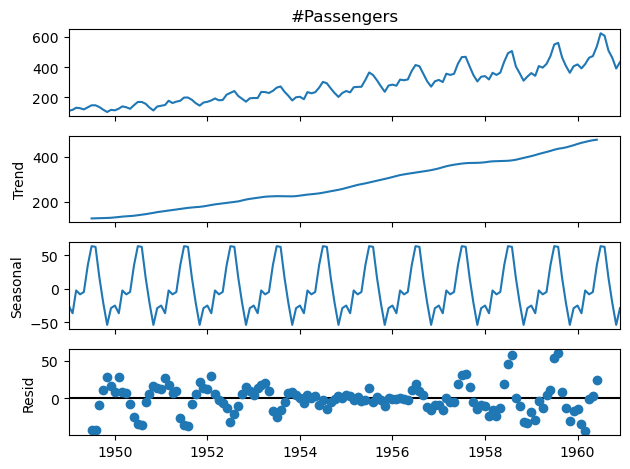

In [114]:
decompose = seasonal_decompose(airpassengers['#Passengers'], model='addictive')
decompose.plot()
plt.show()

The code performs a seasonal decomposition of the #Passengers time series data.
seasonal_decompose is a function from the statsmodels library used to decompose the time series into three main components:

    Trend: The long-term progression of the series (e.g., upward or downward movement).
    Seasonal: The repeating short-term cycle in the series (e.g., yearly seasonality).
    Residual (or Noise): The random variation in the series that cannot be explained by the trend or seasonal components.

model='additive' indicates that the decomposition assumes an additive model, where Time Series = Trend + Seasonal + Residual. This is used when the seasonal variations are relatively constant over time.

Plot Explanation:
    
    
    Original Time Series (#Passengers):
        This is the top plot showing the original monthly passenger data. It shows a clear upward trend with seasonal fluctuations.
        Observation: The number of passengers is generally increasing over time, with peaks and troughs repeating annually.

    
    Trend:
        The second plot shows the trend component of the time series. It represents the general movement in the data over a longer period, smoothing out the short-term seasonal and residual variations.
        Observation: There is a steady upward trend, indicating that the overall number of passengers is increasing over the years.

    
    Seasonal:
        The third plot shows the seasonal component of the time series. It captures the repeating patterns or cycles that occur at the same time each year.
        Observation: There is a clear yearly seasonality pattern with regular peaks and troughs. This suggests consistent seasonal effects on passenger numbers, likely related to holiday seasons or travel trends.

   
    Residual (or Noise):
        The bottom plot shows the residual component, which represents the remaining variation in the data after removing the trend and seasonal components.
        Observation: The residuals are scattered around zero, indicating that most of the patterns in the data have been captured by the trend and seasonal components. Some large residuals in the later years might suggest anomalies or unexplained variations.


Summary of Insights:

    Trend: There is a clear upward trend in passenger numbers over time, indicating growth in the airline industry or increased demand for air travel.
    Seasonality: A strong, consistent seasonal pattern repeats every year, likely driven by factors such as holidays or weather-related travel preferences.
    Residuals: The residual component shows some randomness around zero, with a few large deviations, which may need further investigation.